In [1]:
import zipfile
import pandas as pd
import os

# Path to your zip file
zip_path = '../data/raw/MachineLearningRating_v3.zip'

# Extract the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('../data/raw')  # Extract to the raw data folder

# Find the .txt file inside the extracted folder
txt_file = '../data/raw/MachineLearningRating_v3.txt'

# Load the data assuming pipe separator
data = pd.read_csv(txt_file, sep='|')

# Optionally, save the data to a CSV for easier access
# data.to_csv('data/processed/insurance_data.csv', index=False)


/tmp/ipykernel_8462/523624584.py:16: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(txt_file, sep='|')


# Data Summarization

In [2]:
summary_stats = data.describe()
data_types = data.dtypes
print("Descriptive Statistics:\n", summary_stats)
print("Data Types:\n", data_types)

Descriptive Statistics:
        UnderwrittenCoverID      PolicyID    PostalCode        mmcode  \
count         1.000098e+06  1.000098e+06  1.000098e+06  9.995460e+05   
mean          1.048175e+05  7.956682e+03  3.020601e+03  5.487770e+07   
std           6.329371e+04  5.290039e+03  2.649854e+03  1.360381e+07   
min           1.000000e+00  1.400000e+01  1.000000e+00  4.041200e+06   
25%           5.514300e+04  4.500000e+03  8.270000e+02  6.005692e+07   
50%           9.408300e+04  7.071000e+03  2.000000e+03  6.005842e+07   
75%           1.391900e+05  1.107700e+04  4.180000e+03  6.005842e+07   
max           3.011750e+05  2.324600e+04  9.870000e+03  6.506535e+07   

       RegistrationYear      Cylinders  cubiccapacity      kilowatts  \
count      1.000098e+06  999546.000000  999546.000000  999546.000000   
mean       2.010225e+03       4.046642    2466.743258      97.207919   
std        3.261391e+00       0.294020     442.800640      19.393256   
min        1.987000e+03       0.000000

# Data Quality Assessment

In [3]:
# Check for missing values
missing_values = data.isnull().sum()

# Display missing values count
print("Missing Values:\n", missing_values)


Missing Values:
 UnderwrittenCoverID               0
PolicyID                          0
TransactionMonth                  0
IsVATRegistered                   0
Citizenship                       0
LegalType                         0
Title                             0
Language                          0
Bank                         145961
AccountType                   40232
MaritalStatus                  8259
Gender                         9536
Country                           0
Province                          0
PostalCode                        0
MainCrestaZone                    0
SubCrestaZone                     0
ItemType                          0
mmcode                          552
VehicleType                     552
RegistrationYear                  0
make                            552
Model                           552
Cylinders                       552
cubiccapacity                   552
kilowatts                       552
bodytype                        552
NumberOfDoo

# Univariate Analysis


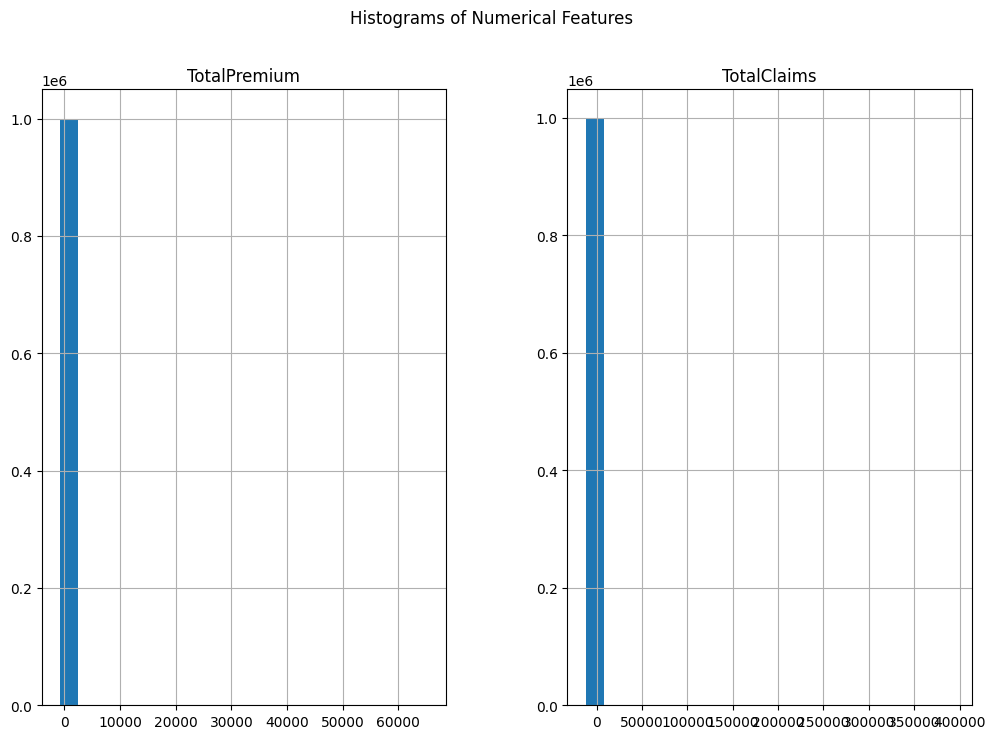

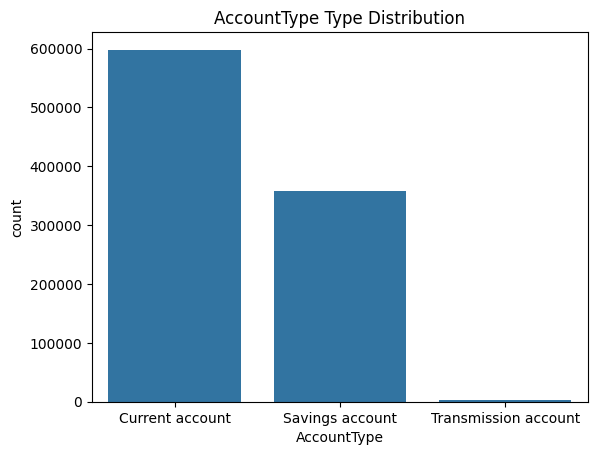

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for numerical columns
numerical_columns = ['TotalPremium', 'TotalClaims']
data[numerical_columns].hist(bins=20, figsize=(12, 8))
plt.suptitle('Histograms of Numerical Features')
plt.show()

# # Bar chart for categorical columns (example: type)
sns.countplot(x='AccountType', data=data)
plt.title('AccountType Type Distribution')
plt.show()


# Bivariate or Multivariate Analysis:

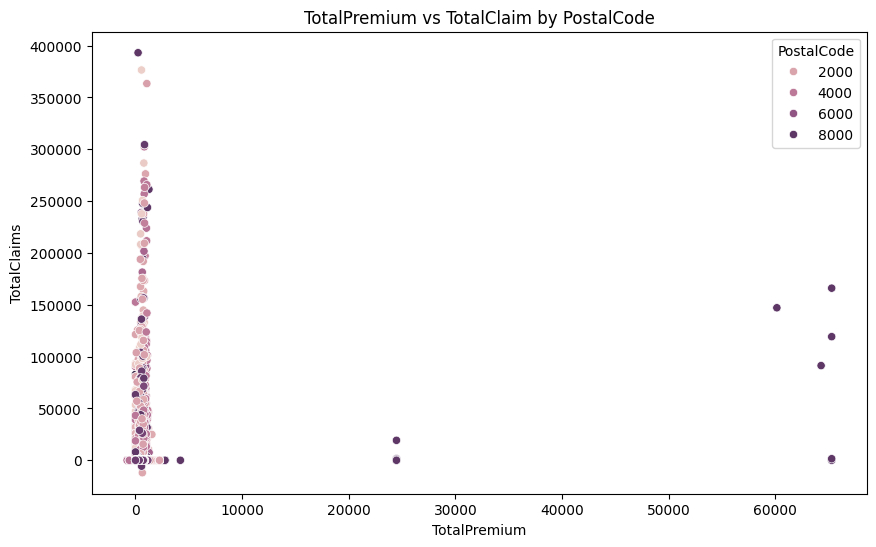

In [24]:
# Scatter plot for TotalPremium vs TotalClaims
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TotalPremium', y='TotalClaims', hue='PostalCode', data=data)
plt.title('TotalPremium vs TotalClaim by PostalCode')
plt.show()


# Data Comparison

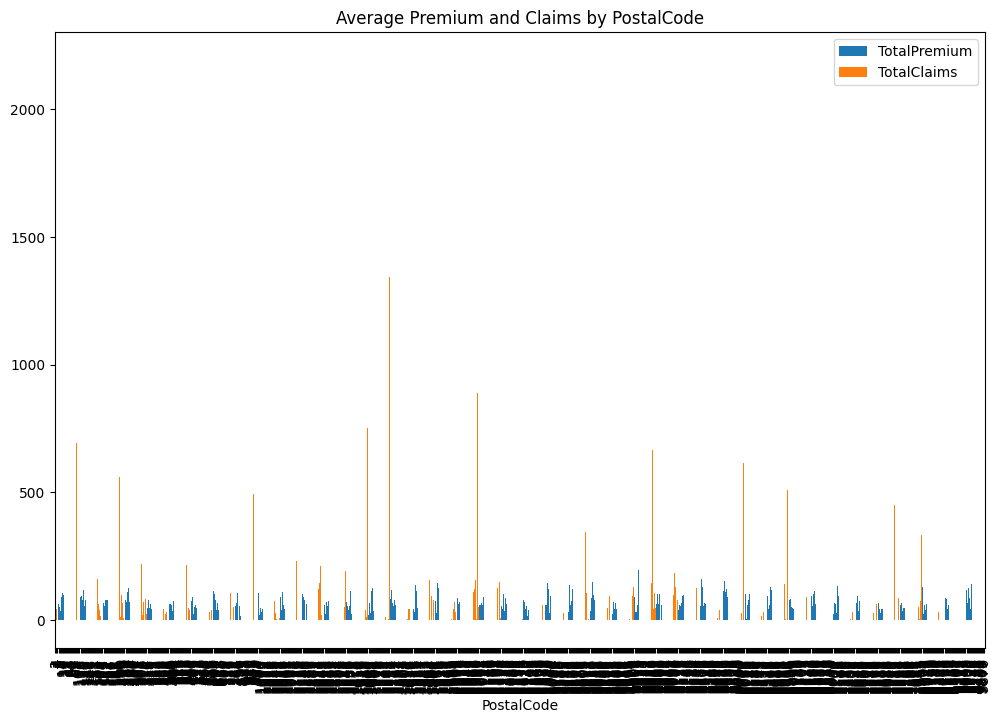

In [25]:
# Group by PostalCode and calculate mean values for premium
postal_code_comparison = data.groupby('PostalCode')[['TotalPremium', 'TotalClaims']].mean()

# Plot trends
postal_code_comparison.plot(kind='bar', figsize=(12, 8))
plt.title('Average Premium and Claims by PostalCode')
plt.show()

# Outlier Detection

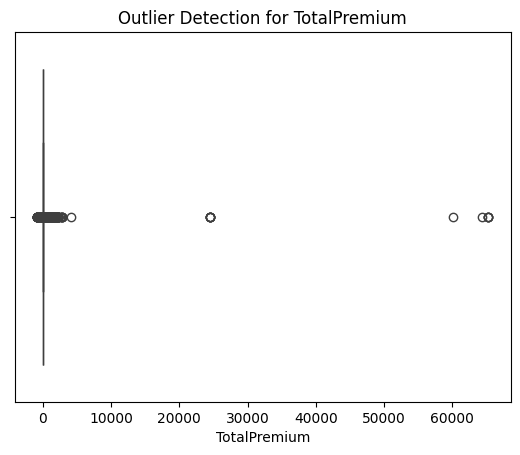

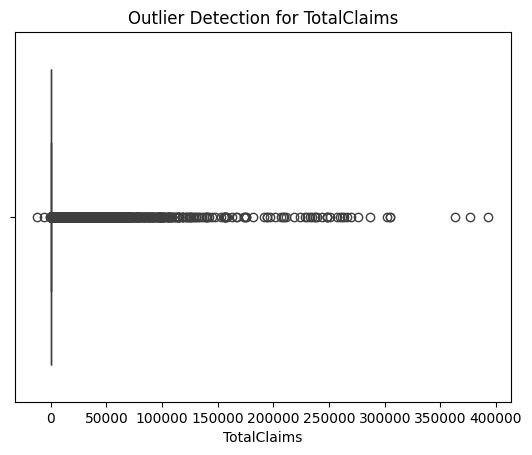

In [26]:
sns.boxplot(x=data['TotalPremium'])
plt.title('Outlier Detection for TotalPremium')
plt.show()

sns.boxplot(x=data['TotalClaims'])
plt.title('Outlier Detection for TotalClaims')
plt.show()

# Visualization

In [ ]:
# Plot 1: Distribution of TotalPremium
plt.figure(figsize=(10, 6))
sns.histplot(data['TotalPremium'], kde=True, color='skyblue')
plt.title('Distribution of Total Premium')
plt.show()

# Plot 2: TotalPremium vs TotalClaims scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TotalPremium', y='TotalClaims', data=data, color='orange')
plt.title('TotalPremium vs TotalClaims')
plt.show()

# Plot 3: Average Premium by AccountType
avg_premium = data.groupby('AccountTy pe')['TotalPremium'].mean()
avg_premium.plot(kind='bar', figsize=(10, 6), color='green')
plt.title('Average Premium by Account Type')
plt.show()
